In [4]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 42

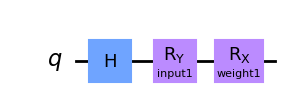

In [1]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

In [2]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [3]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import StatevectorEstimator as Estimator

estimator = Estimator()
estimator_qnn = EstimatorQNN(
    circuit=qc1,
    observables=observable1,
    input_params=[params1[0]],
    weight_params=[params1[1]],
    estimator=estimator,
)
estimator_qnn

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


In [5]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [6]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.30983711]]. 
Shape: (1, 1)


In [27]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.29004447]
 [0.30667044]].  
Shape: (2, 1)


In [28]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [29]:
estimator_qnn.input_gradients = True

In [30]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.3038852]]].  
Shape: (1, 1, 1)
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


In [31]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
    estimator=estimator,
)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


In [34]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape} {estimator_qnn_forward}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape} {estimator_qnn_forward2}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape} {estimator_qnn_weight_grad}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape} {estimator_qnn_weight_grad2}")

Forward output for EstimatorQNN1: (1, 1) [[0.30983711]]
Forward output for EstimatorQNN2: (1, 2) [[ 0.27186018 -0.64026153]]
Backward output for EstimatorQNN1: (1, 1, 1) [[[0.63272767]]]
Backward output for EstimatorQNN2: (1, 2, 1) [[[0.63272767]
  [0.2970094 ]]]


# Sampler 

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


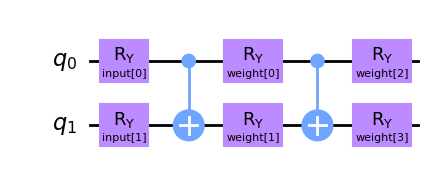

In [35]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [36]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()
sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2, sampler=sampler)
sampler_qnn

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [37]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

In [73]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.02734375 0.26367188 0.50390625 0.20507812]].  
Shape: (1, 4)


In [79]:
sampler_qnn_forward_batched = sampler_qnn.forward(
    [sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights
)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}"
)

Forward pass result for SamplerQNN: [[0.01660156 0.23828125 0.54589844 0.19921875]
 [0.0234375  0.28125    0.49316406 0.20214844]].  
Shape: (2, 4)


In [80]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: None.  
Shape: None
Weight gradients for SamplerQNN: [[[ 0.00830078 -0.10009766 -0.06347656 -0.08837891]
  [ 0.20800781 -0.09423828  0.06982422 -0.23046875]
  [-0.49072266  0.31787109 -0.3125      0.08935547]
  [ 0.27441406 -0.12353516  0.30615234  0.22949219]]].  
Shape: (1, 4, 4)


In [81]:
sampler_qnn.input_gradients = True

In [82]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: [[[-0.06445312 -0.09912109]
  [ 0.38232422 -0.19384766]
  [-0.33154297  0.0859375 ]
  [ 0.01367188  0.20703125]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[ 0.0078125  -0.14746094 -0.05517578 -0.08935547]
  [ 0.20556641 -0.0859375   0.07373047 -0.23242188]
  [-0.48974609  0.34716797 -0.32861328  0.10205078]
  [ 0.27636719 -0.11376953  0.31005859  0.21972656]]].  
Shape: (1, 4, 4)


In [83]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
    sampler=sampler,
)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [85]:
sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}, {sampler_qnn_forward}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}", f"{sampler_qnn_forward2}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}", f"{sampler_qnn_weight_grad}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}", f"{sampler_qnn_weight_grad2}")

Forward output for SamplerQNN1: (1, 4), [[0.02734375 0.26367188 0.50390625 0.20507812]]
Forward output for SamplerQNN2: (1, 2) [[0.22265625 0.77734375]]
Backward output for SamplerQNN1: (1, 4, 4) [[[ 0.0078125  -0.14746094 -0.05517578 -0.08935547]
  [ 0.20556641 -0.0859375   0.07373047 -0.23242188]
  [-0.48974609  0.34716797 -0.32861328  0.10205078]
  [ 0.27636719 -0.11376953  0.31005859  0.21972656]]]
Backward output for SamplerQNN2: (1, 2, 4) [[[ 0.30273438 -0.24462891  0.22216797  0.11572266]
  [-0.30273438  0.24462891 -0.22216797 -0.11572266]]]
